In [1]:
import os

import itertools
import pandas as pd

from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

import ml_insights as mli
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datadir = os.path.join(os.path.realpath('.'), '..')
df_train = pd.read_csv(os.path.join(datadir, 'train_data.csv'))
df_test = pd.read_csv(os.path.join(datadir, 'test_data.csv'))
params = pd.read_csv(os.path.join(datadir, 'tuned_parameters.csv'), index_col=0)

In [3]:
estimator_params = params['RandomForestClassifier'].dropna().to_dict()

In [4]:
# Convert parameters to int if appropriate

for key, value in estimator_params.iteritems():
    try:
        estimator_params[key] = int(value)
    except ValueError:
        estimator_params[key] = value

In [5]:
estimator = RandomForestClassifier(**estimator_params)

In [6]:
estimator.fit(df_train.iloc[:, :-1], df_train.iloc[:, -1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=9, max_leaf_nodes=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
accuracy_score(df_test.iloc[:, -1], estimator.predict(df_test.iloc[:, :-1]))

0.76324186343331202

In [8]:
xray = mli.ModelXRay(model=estimator, data=df_test.iloc[:, :-1])

array([1200,  357, 1224, 2778, 4269, 3944, 1597])

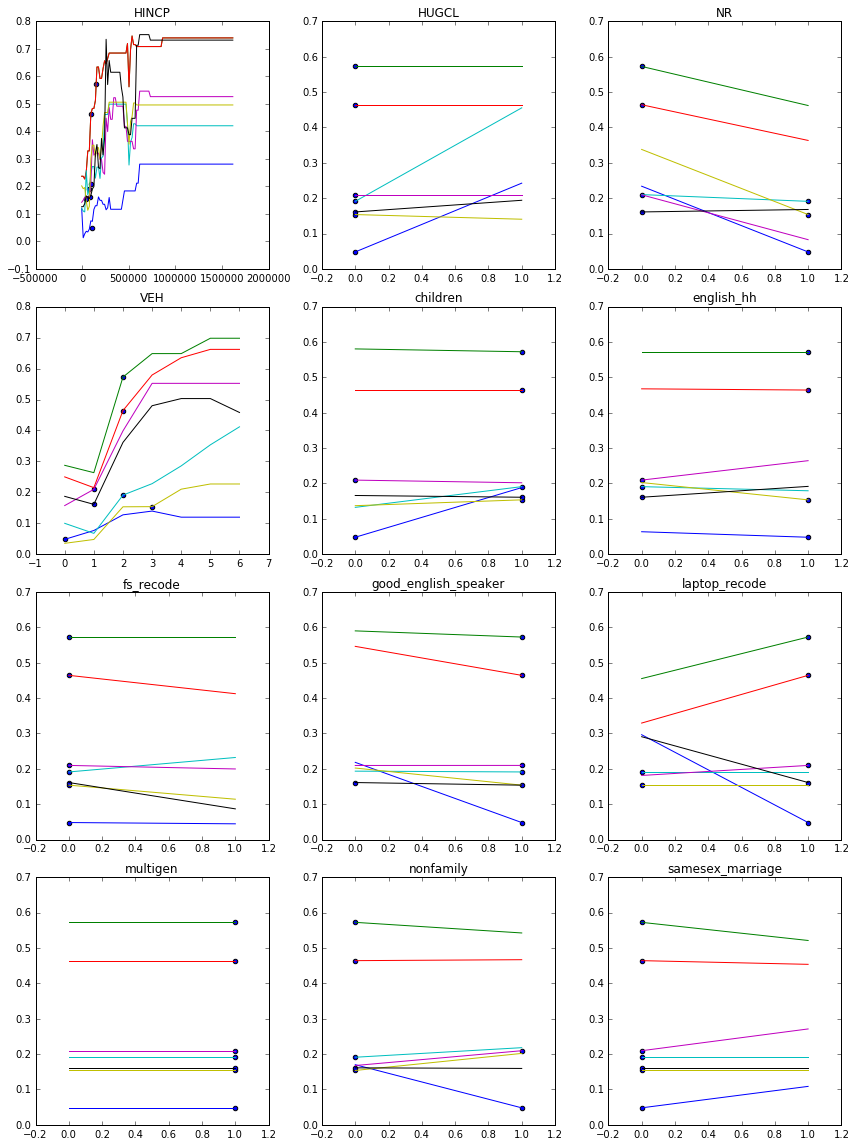

In [9]:
xray.feature_dependence_plots(num_pts=7)

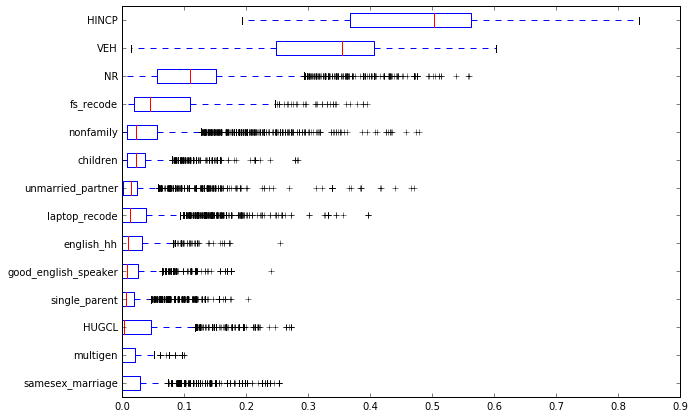

In [10]:
xray.feature_effect_summary()

In [11]:
xray.explain_prediction_difference(0, 2, tol=0.05)

Your initial point has a target value of 0.0363
Your final point has a target value of 0.1304
Changing HINCP from 6000.0 to 120000.0
		changes your target by 0.0899 to 0.1262
----------
Tolerance of 0.05 reached
Current value of 0.1262 is within 5.0% of 0.1304


(['HINCP'],
 [(6000.0, 120000.0)],
 [0.089884043567099559],
 [0.036294095547795752, 0.12617813911489531])